In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/black_friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [4]:
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [7]:
df.isna().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df.rename(columns={'City_Category':'city','Stay_In_Current_City_Years':'years_in_city','Product_Category_1':'pro_1','Product_Category_2':'pro_2','Product_Category_3':'pro_3'},inplace=True)
df.columns

Index(['Gender', 'Age', 'Occupation', 'city', 'years_in_city',
       'Marital_Status', 'pro_1', 'pro_2', 'pro_3', 'Purchase'],
      dtype='object')

In [9]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [10]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df.Age.replace(to_replace=['0-17','18-25','26-35','36-45','46-50','51-55','55+'], value=['teen','young','young','adult','adult','adult','old'],inplace=True)

In [12]:
df.Age.unique()

array(['teen', 'old', 'young', 'adult'], dtype=object)

In [13]:
df.years_in_city.value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: years_in_city, dtype: int64

In [14]:
df.years_in_city.replace(to_replace=['4+'], value=['4'], inplace=True)
df.years_in_city = df.years_in_city.astype(int)

In [15]:
df.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          550068 non-null  object 
 1   Age             550068 non-null  object 
 2   Occupation      550068 non-null  int64  
 3   city            550068 non-null  object 
 4   years_in_city   550068 non-null  int64  
 5   Marital_Status  550068 non-null  int64  
 6   pro_1           550068 non-null  int64  
 7   pro_2           376430 non-null  float64
 8   pro_3           166821 non-null  float64
 9   Purchase        550068 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 42.0+ MB


In [18]:
df.pro_2.fillna(0,inplace=True)
df.pro_3.fillna(0,inplace=True)

In [17]:
df.head()

,Gender,Age,Occupation,city,years_in_city,Marital_Status,pro_1,pro_2,pro_3,Purchase
0,F,teen,10,A,2,0,3,NaN,NaN,8370
1,F,teen,10,A,2,0,1,6.0,14.0,15200
2,F,teen,10,A,2,0,12,NaN,NaN,1422
3,F,teen,10,A,2,0,12,14.0,NaN,1057
4,M,old,16,C,4,0,8,NaN,NaN,7969


In [19]:
df.isna().sum()

Gender            0
Age               0
Occupation        0
city              0
years_in_city     0
Marital_Status    0
pro_1             0
pro_2             0
pro_3             0
Purchase          0
dtype: int64

In [20]:
df.shape

(550068, 10)

## Analysis

In [25]:
cp = df.groupby('city')['Purchase'].count()
cp

city
A    147720
B    231173
C    171175
Name: Purchase, dtype: int64

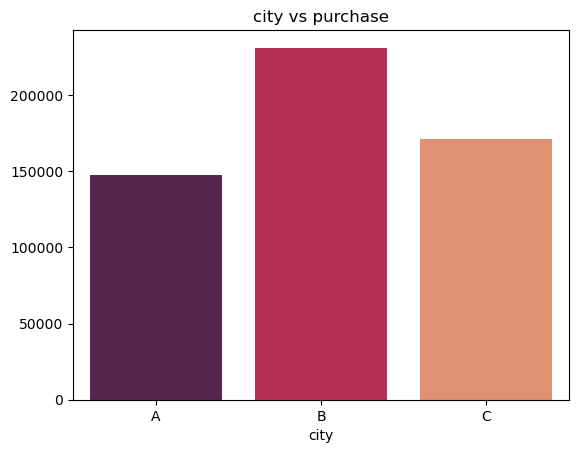

In [23]:
sns.barplot(x=cp.index,y=cp.values,palette="rocket" )
plt.title('city vs purchase');

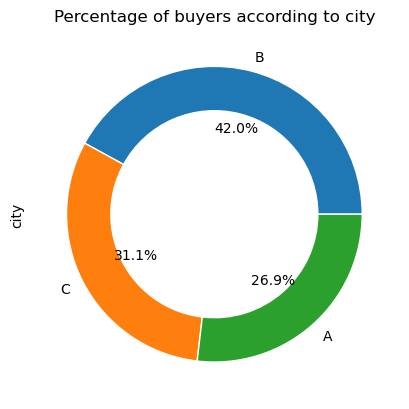

In [80]:
df["city"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of buyers according to city');

In [94]:
op = df.groupby('Occupation')['Purchase'].count()
op

Occupation
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Purchase, dtype: int64

In [95]:
op = op.nlargest(10)
op

Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
Name: Purchase, dtype: int64

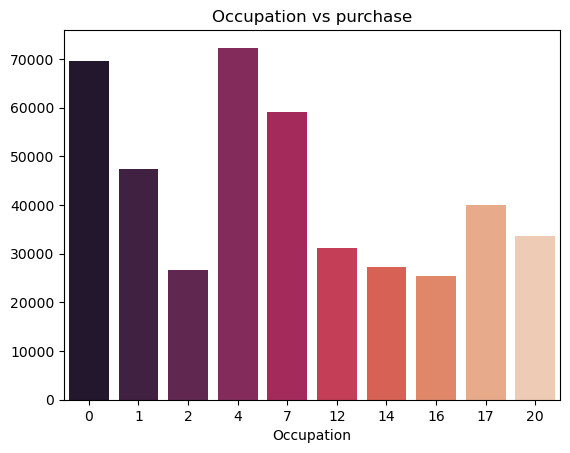

In [96]:
sns.barplot(x=op.index,y=op.values,palette="rocket" )
plt.title('Occupation vs purchase');

In [32]:
ap = df.groupby('Age')['Purchase'].count()
ap

Age
adult    194215
old       21504
teen      15102
young    319247
Name: Purchase, dtype: int64

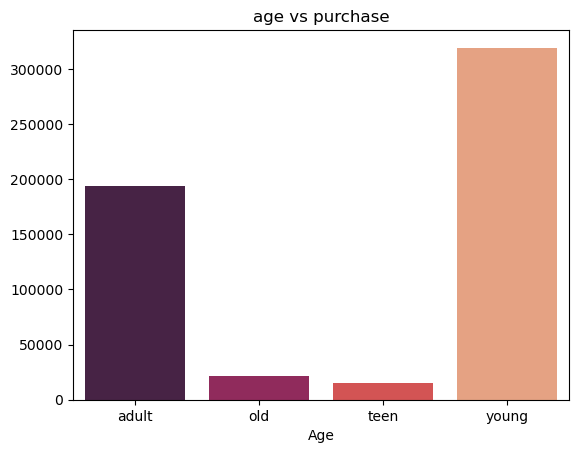

In [35]:
sns.barplot(x=ap.index,y=ap.values,palette="rocket" )
plt.title('age vs purchase');

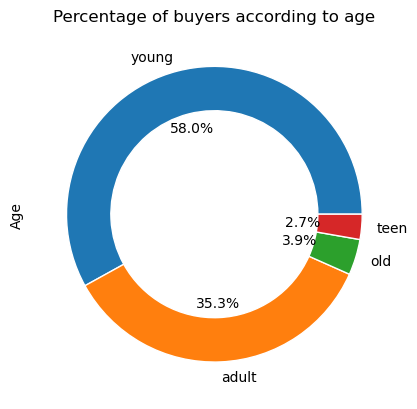

In [74]:
df["Age"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of buyers according to age');

In [36]:
gp = df.groupby('Gender')['Purchase'].count()
gp

Gender
F    135809
M    414259
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'Gender vs purchase')

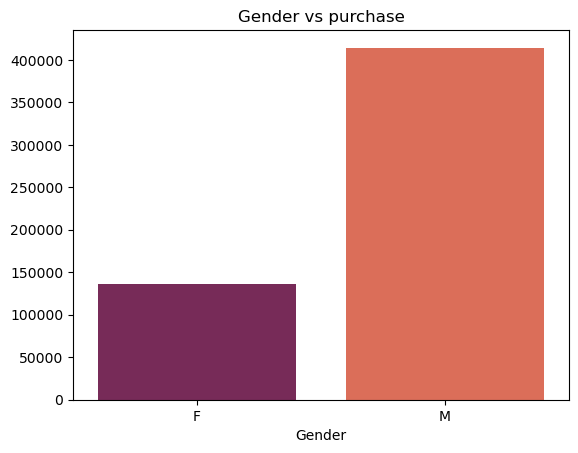

In [41]:
sns.barplot(x=gp.index,y=gp.values,palette='rocket')
plt.title('Gender vs purchase')

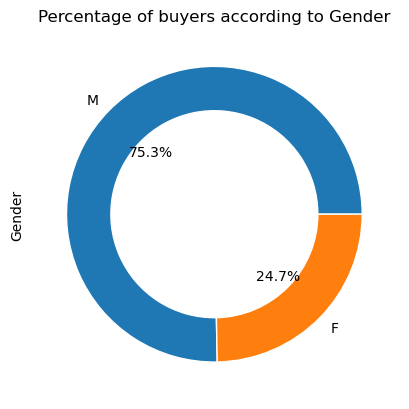

In [76]:
df["Gender"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of buyers according to Gender');

In [43]:
yp = df.groupby('years_in_city')['Purchase'].count()
yp

years_in_city
0     74398
1    193821
2    101838
3     95285
4     84726
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'years in city vs purchase')

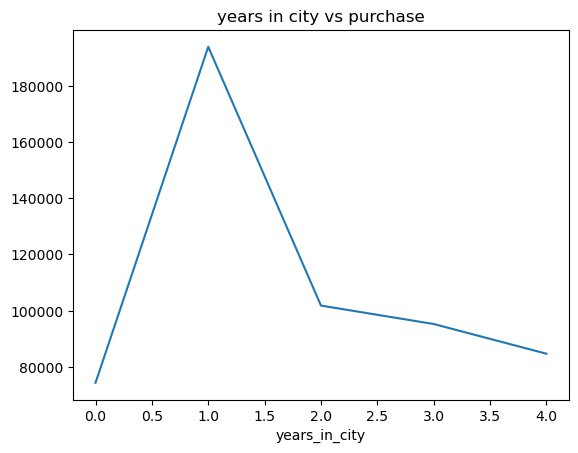

In [46]:
yp.plot(kind="line")
plt.title('years in city vs purchase')

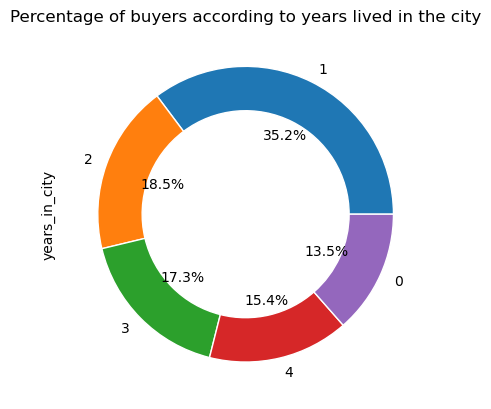

In [77]:
df["years_in_city"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of buyers according to years lived in the city');

In [47]:
mp = df.groupby('Marital_Status')['Purchase'].count()
mp

Marital_Status
0    324731
1    225337
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'marital status vs purchase')

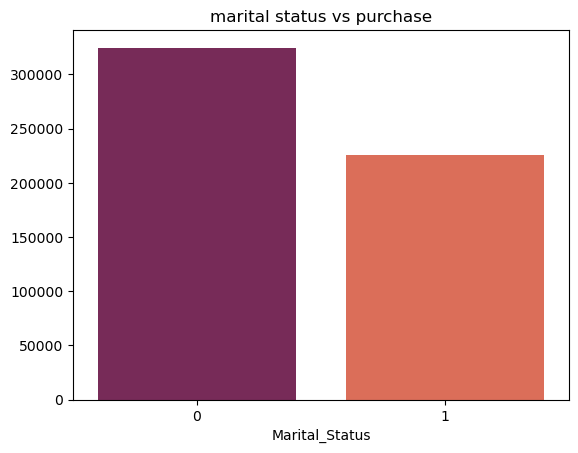

In [49]:
sns.barplot(x=mp.index,y=mp.values,palette='rocket')
plt.title('marital status vs purchase')

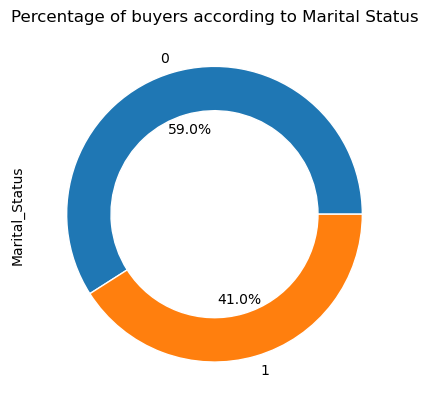

In [79]:
df["Marital_Status"].value_counts().plot(kind="pie", autopct="%.1f%%", wedgeprops=dict(width=.3, edgecolor='w'))
plt.title('Percentage of buyers according to Marital Status');

In [63]:
p1p = df.groupby('pro_1')['Purchase'].count()
p1p = p1p.nlargest(10)
p1p

pro_1
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'product category 1 vs purchase')

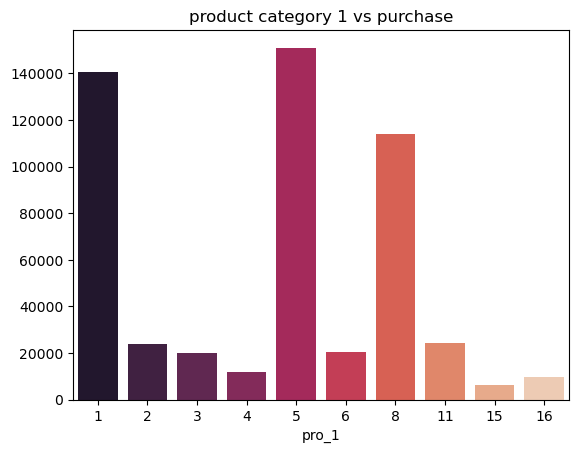

In [68]:
sns.barplot(x=p1p.index,y=p1p.values,palette='rocket')
plt.title('product category 1 vs purchase')

In [69]:
p2p = df.groupby('pro_2')['Purchase'].count()
p2p = p2p.nlargest(10)
p2p

pro_2
0.0     173638
8.0      64088
14.0     55108
2.0      49217
16.0     43255
15.0     37855
5.0      26235
4.0      25677
6.0      16466
11.0     14134
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'product category 2 vs purchase')

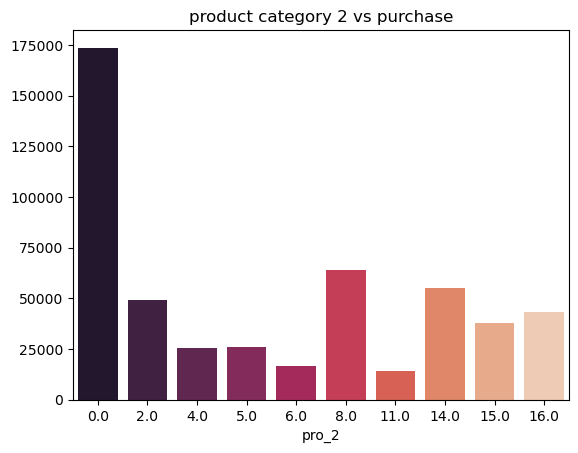

In [70]:
sns.barplot(x=p2p.index,y=p2p.values,palette='rocket')
plt.title('product category 2 vs purchase')

In [98]:
p3p = df.groupby('pro_3')['Purchase'].count()
p3p = p3p.nlargest(10)
p3p

pro_3
0.0     383247
16.0     32636
15.0     28013
14.0     18428
17.0     16702
5.0      16658
8.0      12562
9.0      11579
12.0      9246
13.0      5459
Name: Purchase, dtype: int64

Text(0.5, 1.0, 'product category 3 vs purchase')

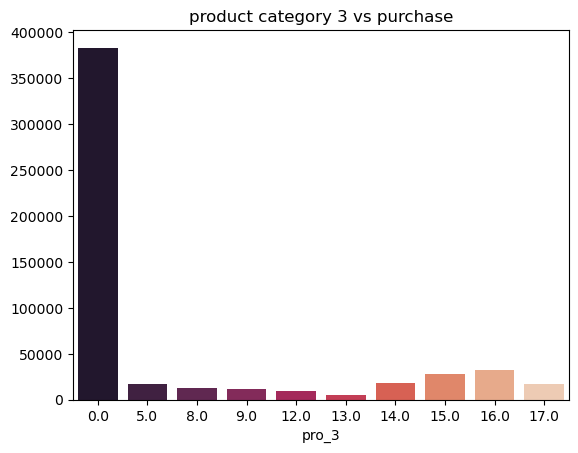

In [99]:
sns.barplot(x=p3p.index,y=p3p.values,palette='rocket')
plt.title('product category 3 vs purchase')

## Inferences

* The spread of purchases among the categoris of the cities isn't substancial. Though category B has the highest purchase of nearly 40% followed by category A 30% and category B 20%
* People of occupation of 4, 0 and 7 purchase substancially more than that of other.
* Young people with age 25-35 are highest buyers followed by adults with age (35-55). Young and Adult comprise of more than 92% of buyers.
* 75% Buyers are males
* People living in the city for a one or two years are most likly to purchase.
* The spread of Married and single people also is'nt substancial with married people being 60% of buyers.
* Products 5, 1 and 8 are highest selling products from category 1.
* Products 8 and 14 are highest selling products from category 2 as we have applied 0 on null values.
* Products 16 is the highest selling product from category 3 as we have applied 0 on null values.